In [7]:
#Upload a file from your hard disk
from google.colab import files
uploaded = files.upload()

Saving Health.xlsx to Health (1).xlsx


In [8]:
#Applied to use Korean fonts
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


The data file (Health.xlsx) was created by collecting data that is freely available from the Health Insurance Corporation (https://nhiss.nhis.or.kr/bd/ay/bdaya001iv.do).
Gender is assigned numerically as male 1 female 2

In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np

plt.rc('font', family='NanumBarunGothic')

data = pd.read_excel('Health.xlsx') #Read uploaded file
X = data.iloc[:, [18, 22]].values   # Cut by selecting a column section in the Excel file, the column always starts from 0
#pd.read_csv('파일명', encoding='cp949') if we read csv file include "hangul"
data.head()

,NO,연령,성별,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,심근경색,수축기 혈압,수축기 5년 전,확장기 혈압,확장기 5년 전,신장〔㎝〕,체중〔㎏〕,５년 전 체중〔㎏〕
0,1,41,1,3,1,1,1,1,1,2,2,1,2,1,1,2,137,98,91,59,169.4,57.0,50.1
1,2,30,1,2,1,1,1,2,2,2,1,1,2,1,1,1,126,163,76,92,164.5,76.6,67.7
2,3,44,2,2,1,1,1,2,2,2,2,2,1,1,1,1,165,68,79,37,155.6,56.5,31.2
3,4,54,1,2,2,2,1,2,2,1,2,2,2,2,2,1,102,113,62,62,163.7,53.5,58.1
4,5,57,1,2,2,2,1,2,2,2,2,2,2,2,2,1,136,113,89,70,156.1,64.1,38.3


In [2]:
data[['연령','심근경색','수축기 혈압']]

,연령,심근경색,수축기 혈압
0,41,2,137
1,30,1,126
2,44,1,165
3,54,1,102
4,57,1,136
5,48,2,109
6,53,2,131
7,35,1,116
8,38,1,105
9,46,1,122


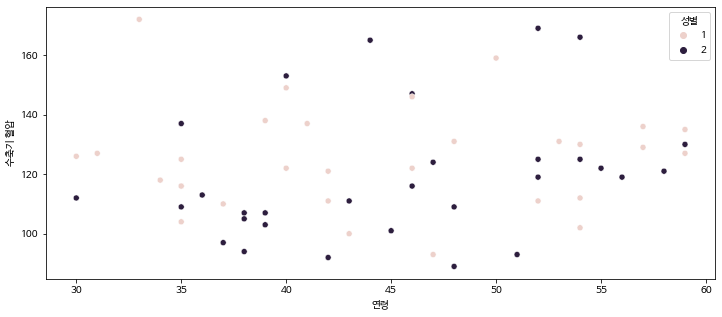

In [4]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='연령', y='수축기 혈압', data=data, hue='성별')

Problem 1. Display the distribution of weight and age as shown in the graph above. If Hangul is not displayed properly, after installing the font, run Runtime->Restart in the Google Colab menu and run it except the codes for installing the font.



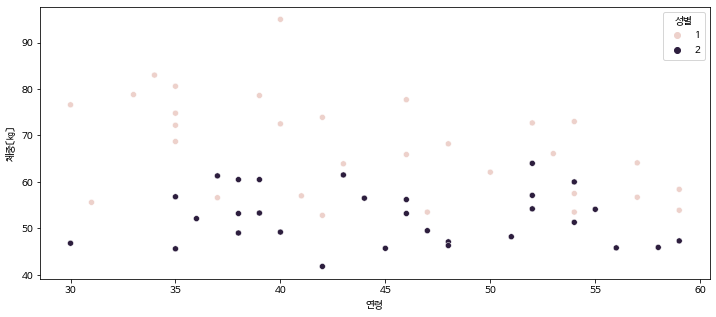

In [5]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='연령', y='체중〔㎏〕', data=data, hue='성별')

Problem 2. Using the graph obtained in Problem 1, show the results of applying the silhouette value and k-mean cluster

In [26]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics

df_data = data[['연령','체중〔㎏〕']]
for i in range(3,60):
    labels=cluster.KMeans(n_clusters=i, init="k-means++", random_state=200).fit(data).labels_
    print("Silhouette score for k(clusters) = "+str(i)+" is "
    +str(metrics.silhouette_score(data,labels,metric="euclidean",sample_size=1000, random_state=200)))

Silhouette score for k(clusters) = 3 is 0.2019851759824317
Silhouette score for k(clusters) = 4 is 0.1907860651476542
Silhouette score for k(clusters) = 5 is 0.17275195378732097
Silhouette score for k(clusters) = 6 is 0.16621109367151624
Silhouette score for k(clusters) = 7 is 0.17676818183245685
Silhouette score for k(clusters) = 8 is 0.16858786513601148
Silhouette score for k(clusters) = 9 is 0.15885806954382317
Silhouette score for k(clusters) = 10 is 0.18977736950188454
Silhouette score for k(clusters) = 11 is 0.15424522996156034
Silhouette score for k(clusters) = 12 is 0.18984688495092897
Silhouette score for k(clusters) = 13 is 0.15993172244858903
Silhouette score for k(clusters) = 14 is 0.18816004857921645
Silhouette score for k(clusters) = 15 is 0.1824362639492581
Silhouette score for k(clusters) = 16 is 0.18679525816128784
Silhouette score for k(clusters) = 17 is 0.18411695598608088
Silhouette score for k(clusters) = 18 is 0.18835357956066362
Silhouette score for k(clusters) =

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


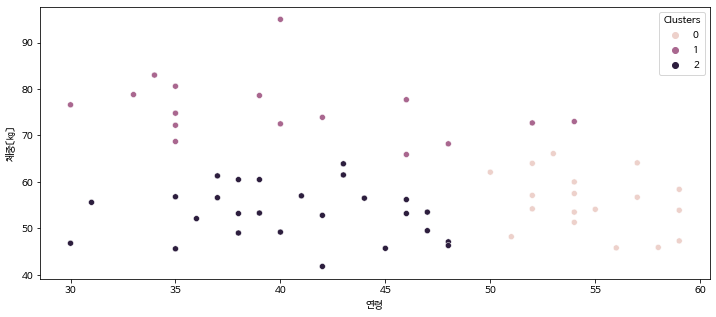

In [30]:
kmeans = cluster.KMeans(n_clusters=3, init="k-means++")
kmeans = kmeans.fit(df_data)

df_data['Clusters'] = kmeans.labels_

plt.figure(figsize=(12, 5))
sns.scatterplot(x='연령', y='체중〔㎏〕', data=df_data, hue='Clusters')

Problem 3. When comparing men and women, plot the graph showing which gender has higher blood pressure

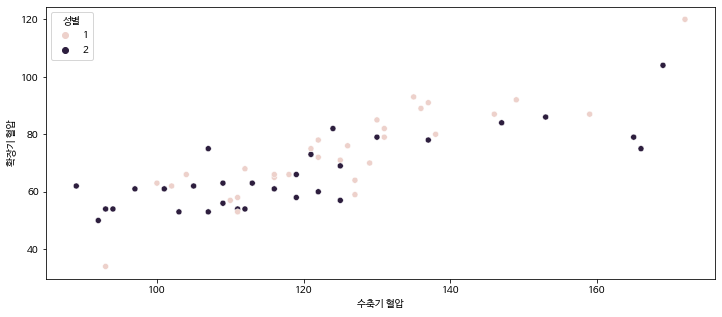

In [31]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='수축기 혈압', y='확장기 혈압', data=data, hue='성별')

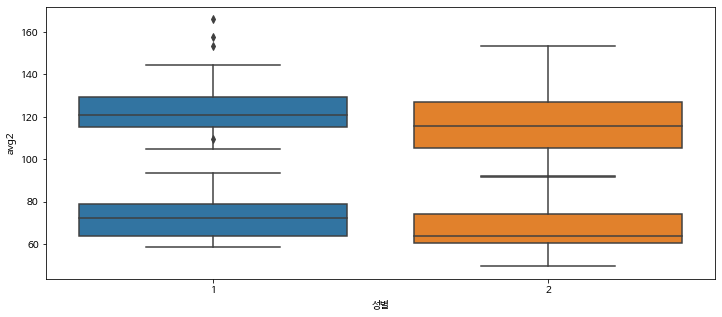

In [37]:
plt.figure(figsize=(12, 5))
sns.boxplot(x = '성별', y = 'avg1', data = data )
sns.boxplot(x = '성별', y = 'avg2', data = data )

In [33]:
data['avg1'] = (data['수축기 혈압']+data['수축기 5년 전'])/2
data['avg2'] = (data['확장기 혈압']+data['확장기 5년 전'])/2
data.head()

,NO,연령,성별,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,심근경색,수축기 혈압,수축기 5년 전,확장기 혈압,확장기 5년 전,신장〔㎝〕,체중〔㎏〕,５년 전 체중〔㎏〕,avg1,avg2
0,1,41,1,3,1,1,1,1,1,2,2,1,2,1,1,2,137,98,91,59,169.4,57.0,50.1,117.5,75.0
1,2,30,1,2,1,1,1,2,2,2,1,1,2,1,1,1,126,163,76,92,164.5,76.6,67.7,144.5,84.0
2,3,44,2,2,1,1,1,2,2,2,2,2,1,1,1,1,165,68,79,37,155.6,56.5,31.2,116.5,58.0
3,4,54,1,2,2,2,1,2,2,1,2,2,2,2,2,1,102,113,62,62,163.7,53.5,58.1,107.5,62.0
4,5,57,1,2,2,2,1,2,2,2,2,2,2,2,2,1,136,113,89,70,156.1,64.1,38.3,124.5,79.5


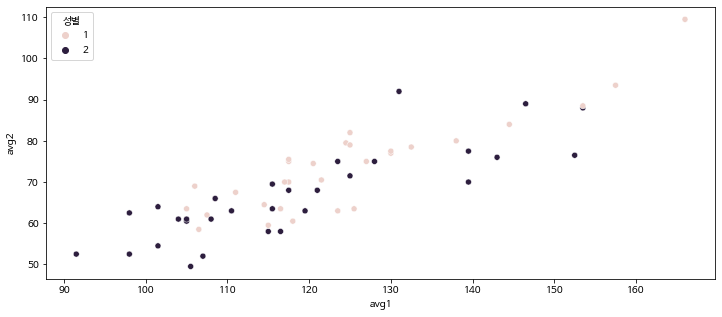

In [34]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='avg1', y='avg2', data=data, hue='성별')

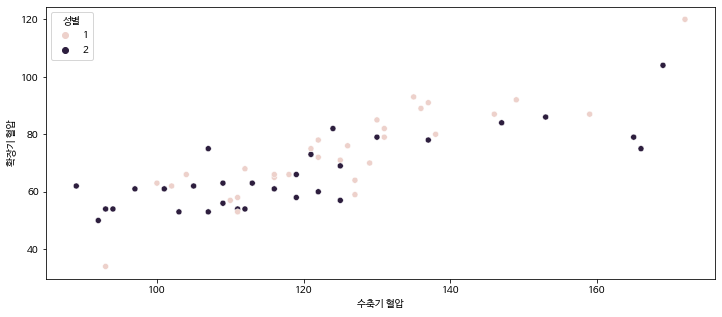

In [35]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='수축기 혈압', y='확장기 혈압', data=data, hue='성별')